## Ejercio de Tarea 01
Para los datos de la [Liga Nacional de Fútbol](https://github.com/HaydeePeruyero/MultivariateStatisticalAnalysis/blob/main/data/Liga_nacional_de_futbol.csv)

**a**. Ajustar un modelo de regresión lineal múltiple que relacione la cantidad de juegos ganados con las yardas por aire del equipo ($x_2$), el porcentaje de jugadas por tierra ($x_7$) y las yardas por tierra del contrario ($x_8$).  

**b**. Formar la tabla de análisis de varianza y probar la significancia de la regresión.  

**c**. Calcular el estadístico *t* para probar las hipótesis $H_0 : \beta_2 = 0$, $H_0 : \beta_7 = 0$ y $H_0 : \beta_8 = 0$. ¿Qué conclusiones se pueden sacar acerca del papel de las variables $x_2$, $x_7$ y $x_8$ en el modelo?  

**d**. Calcular $R^2$ y $R^2_{adj}$ para este modelo.  

**e**. Trazar una gráfica de probabilidad normal de los residuales. ¿Parece haber algún problema con la hipótesis de normalidad?  

**f**. Trazar e interpretar una gráfica de los residuales en función de la respuesta predicha.  

**g**. Trazar las gráficas de los residuales en función de cada una de las variables regresoras. ¿Implican esas gráficas que se especificó en forma correcta el regresor?  

**h**. Calcular un intervalo de confianza de $95\%$ para $\beta_7$ y un intervalo de confianza de $95\%$ para la cantidad media de juegos ganados por un equipo cuando $x_2 = 2300$, $x_7 = 56$ y $x_8 = 2100$.  

**i**. Ajustar un modelo a esos datos, usando solo $x_7$ y $x_8$ como regresores y probar la significancia de la regresión.  

**j**. Calcular $R^2$ y $R^2_{adj}$. Compararlos con los resultados del modelo anterior.  

**k**. Calcular un intervalo de confianza de $95\%$ para $\beta_7$. También, un intervalo de confianza de $95\%$ para la cantidad media de juegos ganados por un equipo cuando $x_7 = 56$ y $x_8 = 2100$. Comparar las longitudes de esos intervalos de confianza con las longitudes de los correspondientes al modelo anterior.  

**l**. ¿Qué conclusiones se pueden sacar de este problema, acerca de las consecuencias de omitir un regresor importante de un modelo?

## 0. Importar 

In [224]:
library(GGally)
library(ggplot2)
library(grid)
library(gridExtra)

In [21]:
DatasetFutbol <- read.csv('./Liga_nacional_de_futbol.csv')

head(DatasetFutbol)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
1,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
2,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575
3,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175
4,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
5,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866
6,11,2309,2927,39.7,74.1,8,786,61.0,1848,2339


## **a**. Modelo de Regresión

Por medio del plot generado, se puede apreciar que los atributos (variables de regresión) consideradas capturan una tendendecia o relación con la variable de respuesta. Por lo que se tiene un modelo, que a priori, podría generar buenas predicciones (estimaciones).

In [22]:
# Ajuste de Modelo usando Funciones de R 

LinearModel <- lm('y ~ x2 + x7 + x8',DatasetFutbol)

In [23]:
#' Función para calcular los valores de los parámetro betas para un modelo lineal.
ManualLinearModel <- function(
    Dataset,
    FeaturesModel,
    TargetLabel
)
{
    DataMatrixX <- as.matrix(cbind(x0=1,Dataset[FeaturesModel]))
    RealValuesY <- as.matrix(Dataset[TargetLabel])
    EstimateBetas <- solve(t(DataMatrixX)%*%DataMatrixX) %*% t(DataMatrixX) %*% RealValuesY

    return(list(
        DataMatrixX = DataMatrixX,
        RealValuesY = RealValuesY,
        EstimateBetas = EstimateBetas
    ))
}

In [24]:
# Ajuste de Modelo de forma Manual

FeaturesModel <- c('x2','x7','x8')
TargetLabel <- 'y'

LinearModelManual <- ManualLinearModel(DatasetFutbol,FeaturesModel,TargetLabel)
DataMatrixX <- LinearModelManual$DataMatrixX
RealValuesY <- LinearModelManual$RealValuesY
EstimateBetas <- LinearModelManual$EstimateBetas

EstimateBetas

,y
x0,-1.808372059
x2,0.003598070
x7,0.193960210
x8,-0.004815494


In [25]:
summary(LinearModel)


Call:
lm(formula = "y ~ x2 + x7 + x8", data = DatasetFutbol)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0370 -0.7129 -0.2043  1.1101  3.7049 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.808372   7.900859  -0.229 0.820899    
x2           0.003598   0.000695   5.177 2.66e-05 ***
x7           0.193960   0.088233   2.198 0.037815 *  
x8          -0.004816   0.001277  -3.771 0.000938 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.706 on 24 degrees of freedom
Multiple R-squared:  0.7863,	Adjusted R-squared:  0.7596 
F-statistic: 29.44 on 3 and 24 DF,  p-value: 3.273e-08


In [150]:
#' Función para generar el plot de dispersión entre los atributos y la variable de respuesta.
PlotScatterReg <- function(
    Dataset,
    FeaturesModel,
    TargetLabel,
    TargetName
)
{
    plot <- ggpairs(
    Dataset[c(FeaturesModel,TargetLabel)],
        title = paste('Relación de Atributos con\n',TargetName),
        lower = list(continuous = wrap('smooth',method='lm',se=FALSE,color='blue')),
        upper = list(continuous = wrap('smooth',method='lm',se=FALSE,color='blue')),
        diag = list(continuous = wrap('barDiag',bins=6,fill='blue'))
    ) + 
    theme_minimal() + 
    theme(
        plot.title = element_text(hjust=0.5,size=18),
        axis.text = element_text(size=10)
    )

    return(plot)
}

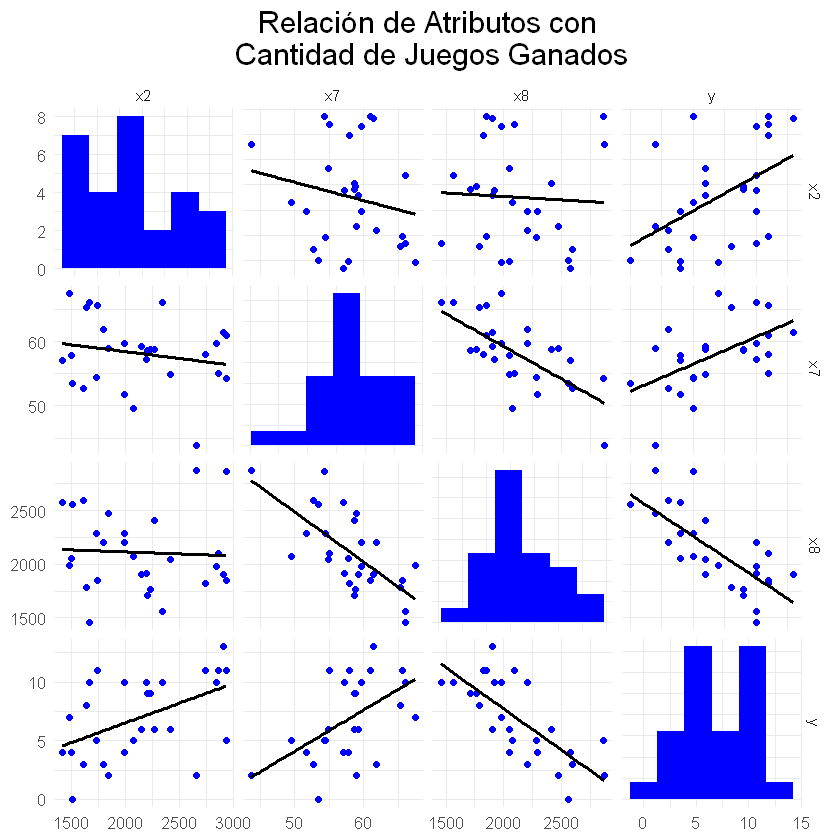

In [151]:
PlotScatterReg(
    DatasetFutbol,
    FeaturesModel,
    TargetLabel,
    'Cantidad de Juegos Ganados'
)

## **b**. Tabla de Análisis de Varianza

Usando los valores que se encuentran en la columna de `Cuadrados Medios`, permiten decir que el modelo se ajusta adecuadamente, debido a que el valor en los Cuadrados Medios Residuales es un valor bajo. Aplicando la prueba de significancia de la regresión, se tiene que el estadistico $F_0$ es mayor que a $F_1$ (de manera notoria) por lo que la cantidad de juegos ganados depende linealmente de por al menos un de las variables de estudio.

In [86]:
#' Función para construir la tabla de ANOVA en base a un modelo de Regresión Lineal, se extraen los valores de interés y son reacomodados en un formato tabular.
ANOVA_Table <- function(
    LinearModel
) 
{
    PartANOVA <- anova(LinearModel)
    Summary <- summary(LinearModel)
  
    SumSquares_Reg <- sum(PartANOVA$`Sum Sq`[1:(nrow(PartANOVA)-1)])
    SumSquares_Res <- PartANOVA$`Sum Sq`[nrow(PartANOVA)]
    SumSquares_Tot <- SumSquares_Reg + SumSquares_Res

    DegreeFreedom_Reg <- sum(PartANOVA$Df[1:(nrow(PartANOVA)-1)])
    DegreeFreedom_Res <- PartANOVA$Df[nrow(PartANOVA)]
    DegreeFreedom_Tot <- DegreeFreedom_Reg + DegreeFreedom_Res

    ANOVATable <- data.frame(
        'Fuente de Variación' = c('Regresión', 'Residuales', 'Total'),
        stringsAsFactors = FALSE
    )
  
    ANOVATable$'Suma de Cuadrados' = c(SumSquares_Reg,SumSquares_Res,SumSquares_Tot)
    ANOVATable$'Grados de Libertad' = c(DegreeFreedom_Reg,DegreeFreedom_Res,DegreeFreedom_Tot)
    ANOVATable$'Cuadrados Medios' <- ANOVATable$`Suma de Cuadrados`/ANOVATable$`Grados de Libertad`
    ANOVATable$'F_0' <- c(Summary$fstatistic[1],NA,NA)
  
    return(ANOVATable)
}

#' Función para construir la tabla de ANOVA en base a las observaciones (`DataMatrixX` y `RealValuesY`) y los coeficientes de regresión (`EstimateBetas`), se hacen uso de las formulas matriciales para determinar los diferentes valores de la tabla.
ANOVA_TableManual <- function(
    DataMatrixX,
    RealValuesY,
    EstimateBetas
) 
{
    SizeN <- nrow(DataMatrixX)
    Parameters <- length(EstimateBetas)

    SumSquares_Tot <- as.numeric(t(RealValuesY) %*% RealValuesY - sum(RealValuesY)^2 / SizeN)
    SumSquares_Reg <- as.numeric(t(EstimateBetas) %*% t(DataMatrixX) %*% RealValuesY - sum(RealValuesY)^2 / SizeN)
    SumSquares_Res <- SumSquares_Tot - SumSquares_Reg

    DegreeFreedom_Reg <- Parameters - 1
    DegreeFreedom_Res <- SizeN - Parameters
    DegreeFreedom_Tot <- DegreeFreedom_Reg + DegreeFreedom_Res

    MeanSquares_Reg <- SumSquares_Reg / DegreeFreedom_Reg
    MeanSquares_Res <- SumSquares_Res / DegreeFreedom_Res

    ANOVATable <- data.frame(
        'Fuente de Variación' = c('Regresión', 'Residuales', 'Total'),
        stringsAsFactors = FALSE
    )

    ANOVATable$'Suma de Cuadrados' = c(SumSquares_Reg,SumSquares_Res,SumSquares_Tot)
    ANOVATable$'Grados de Libertad' = c(DegreeFreedom_Reg,DegreeFreedom_Res,DegreeFreedom_Tot)
    ANOVATable$'Cuadrados Medios' <- ANOVATable$`Suma de Cuadrados`/ANOVATable$`Grados de Libertad`
    ANOVATable$'F_0' <- c(MeanSquares_Reg/MeanSquares_Res,NA,NA)

    return(ANOVATable)
}

In [105]:
ANOVA_Model = ANOVA_Table(LinearModel)
ANOVA_Model

Fuente.de.Variación,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
<chr>,<dbl>,<int>,<dbl>,<dbl>
Regresión,257.0943,3,85.69809,29.43687
Residuales,69.8700,24,2.91125,NA
Total,326.9643,27,12.10979,NA


In [87]:
ANOVA_TableManual(
    DataMatrixX,
    RealValuesY,
    EstimateBetas
)

Fuente.de.Variación,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Regresión,257.0943,3,85.69809,29.43687
Residuales,69.8700,24,2.91125,NA
Total,326.9643,27,12.10979,NA


## **c**. Prueba sobre los Coeficientes Individuales de Regresión

Las tres variables tiene un valor en sus respectivos estadísticos $t_0$ mayor, en valor absoluto, a $t_1$, por lo que las tres variables tienen una influencia sobre la variable de respuesta. Aunque la variable $x_7$ tiene una menor influencia o impacto debido a que su valor se aproxima o se parece a $t_1$, por lo que esta variable no es significativa para el modelo.

In [ ]:
#' Función para calcular la matriz de covarianza de los parámetros o coeficientes de regresión en base a las observaciones y modelo lineal.
CalculatedCovarianceEstimateBetas <- function(
    LinearModel,
    Dataset,
    FeaturesModel
)
{
    SizeN <- nrow(Dataset)
    DataMatrixX <- as.matrix(cbind(x0=1,Dataset[FeaturesModel]))

    PartANOVA <- anova(LinearModel)
    EstimateSquareSigma <- PartANOVA$`Sum Sq`[nrow(PartANOVA)]/df.residual(LinearModel)

    return(EstimateSquareSigma*solve(t(DataMatrixX)%*%DataMatrixX))
}

#' Función para calcular el estadístico t_0 para la prueba sobre los coeficientes individuales de regresión en un Modelo Lineal; también se muestra el valor de t_1 (para la prueba alternativa) con un cierto nivel de significancia.
TestIndividualCoefficients <- function(
    LinearModel,
    Dataset,
    FeaturesModel,
    LevelSignificance = 0.05
)
{
    CovarianceEstimateBetas <- CalculatedCovarianceEstimateBetas(LinearModel,Dataset,FeaturesModel)

    tValue_1 <- qt(1-LevelSignificance/2,df=LinearModel$df.residual)
    cat(sprintf('t_1 :: %.4f\n', tValue_1))

    Coefficients <- coef(LinearModel)[-1]
    FeatureNames <- names(Coefficients)

    cat('\nt_0 Values\n')
    for (index_feature in seq_along(FeatureNames))
    {
        feature <- FeatureNames[index_feature]
        beta_value <- Coefficients[index_feature]
    
        variance_beta <- CovarianceEstimateBetas[index_feature+1,index_feature+1]
    
        tValue_0 <- beta_value / sqrt(variance_beta)

        cat(sprintf('%s :: %.4f\n',feature,tValue_0))
    }
}

In [ ]:
# Calculo de valores t_0 y t_1

TestIndividualCoefficients(LinearModel,DatasetFutbol,FeaturesModel)

t_1 :: 2.0639

t_0 Values
x2 :: 5.1771
x7 :: 2.1983
x8 :: -3.7710


## **d**. Métricas del Modelo

Las métricas del modelo son bajas, esto representa que no se está modelando adecuadamente la variable de respuesta pero que a la vez se tiene oportunidad de mejorar (añadir interacciones o eliminar la variable de intercepción). Al observar el plot, se puede ver que existen observaciones que no se ajustan al modelo propuesto, teniendo que empeore el rendimiento del propio modelo aunque en algunas instancias tenga un comportamiento esperado y bien ajustado.

In [120]:
# Scores usando el Modelo

cat(sprintf('R^2 :: %.4f\n',summary(LinearModel)$r.squared))
cat(sprintf('R^2 Adjustada :: %.4f\n',summary(LinearModel)$adj.r.squared))

R^2 :: 0.7863
R^2 Adjustada :: 0.7596


In [116]:
#' Función para calcular el puntaje r^2 de forma manual.
ManualRSquared <- function(
    ANOVA
)
{
    SumSquares = ANOVA$`Suma de Cuadrados`
    return(SumSquares[1]/SumSquares[3])
}

#' Función para calcular el puntaje r^2 ajustado de forma manual.
ManualAdjRSquared <- function(
    ANOVA
)
{
    r_squared = ManualRSquared(ANOVA)
    df_tot = ANOVA$`Grados de Libertad`[3]
    df_red = ANOVA$`Grados de Libertad`[2]

    return(1-((1-r_squared)*df_tot)/df_red)
}

In [ ]:
# Scores usando Operaciones Manuales

RSquared <- ManualRSquared(ANOVA_Model)
RSquared_Adj <- ManualAdjRSquared(ANOVA_Model)

cat(sprintf('R^2 :: %.4f\n',RSquared))
cat(sprintf('R^2 Adjustada :: %.4f\n',RSquared_Adj))

R^2 :: 0.7863
R^2 Adjustada :: 0.7596


In [ ]:
#' Función para plotear los valores esperados y estimados del modelo lineal.
PlotExpectedEstimate <- function(
    LinearModel,
    ExpectedValuesY
) 
{
    plot_data <- data.frame(
        Observados = ExpectedValuesY,
        Estimados = fitted(LinearModel)
    )
  
  # Crear el gráfico con ggplot2
  plot <- ggplot(plot_data, aes(x = Observados, y = Estimados)) +
    geom_point(alpha=0.7,color='blue',size=3) +
    geom_abline(
        intercept = 0, 
        slope = 1, 
        color = 'gray', 
        linetype = 'dotted',
        linewidth = 2
    ) +
    labs(
        title = 'Ajuste del Modelo',
        x = 'Valores Observados',
        y = 'Valores Estimados'
    ) +
    theme_minimal() + 
    theme(
        plot.title = element_text(hjust=0.5,size=18),
        axis.text = element_text(size=12),
        axis.title = element_text(size=14)
    )

    return(plot)
}

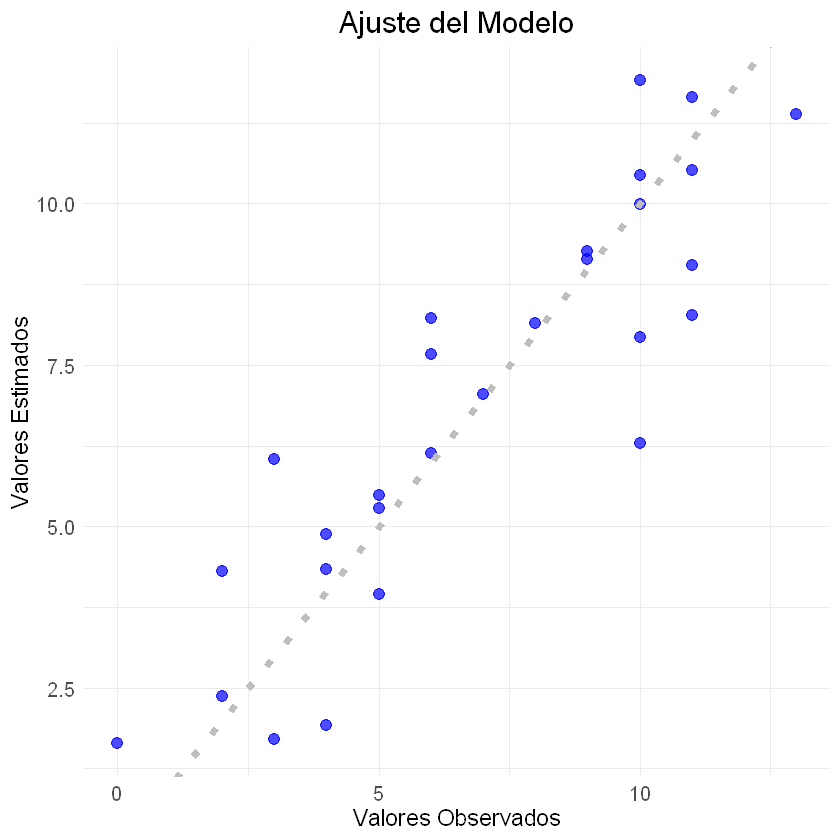

In [158]:
# Plot de los valores esperados (observados) y estimados

PlotExpectedEstimate(LinearModel,DatasetFutbol$y)

## **e**. Gráfica de Probabilidad Normal de los Residuales

Se tiene que la parte central del Q-Q plot tiene una ligera forma de S, esto implica que existe un ligero sesgo en los residuales centrales, pero las colas no son pesadas (se alinean a la recta identidad), por lo que los residuales podrían seguir una distribución normal con media $0$.

In [179]:
#' Función para plotear los cuartiles de los valores predichos (observados/esperados contra los obtenidos).
PlotQQResiduals <- function(
    LinearModel
)
{
    Residuals <- resid(LinearModel)
    QQData <- qqnorm(Residuals, plot.it = FALSE)
  
    LineFit <- lm(QQData$y ~ QQData$x)
    Intercept <- coef(LineFit)[1]
    Slope <- coef(LineFit)[2]
  
    PlotData <- data.frame(
        Theoretical = QQData$x,
        Residuals = QQData$y
    )
  
    plot <- ggplot(PlotData,aes(x=Theoretical,y=Residuals)) +
        geom_point(alpha=0.7,color='blue',size=3) +
        geom_abline(
            intercept = Intercept,
            slope = Slope,
            color = 'gray',
            linetype = 'dotted',
            linewidth = 1.2
        ) +
        labs(
            x = 'Cuantiles Teóricos',
            y = 'Cuantiles de Residuales',
            title = 'Probabilidad Normal de los Residuales'
        ) +
        theme_minimal() +
        theme(
            plot.title = element_text(size=18,hjust=0.5),
            axis.title = element_text(size=14),
            axis.text = element_text(size=12),
        )
  
  return(plot)
}

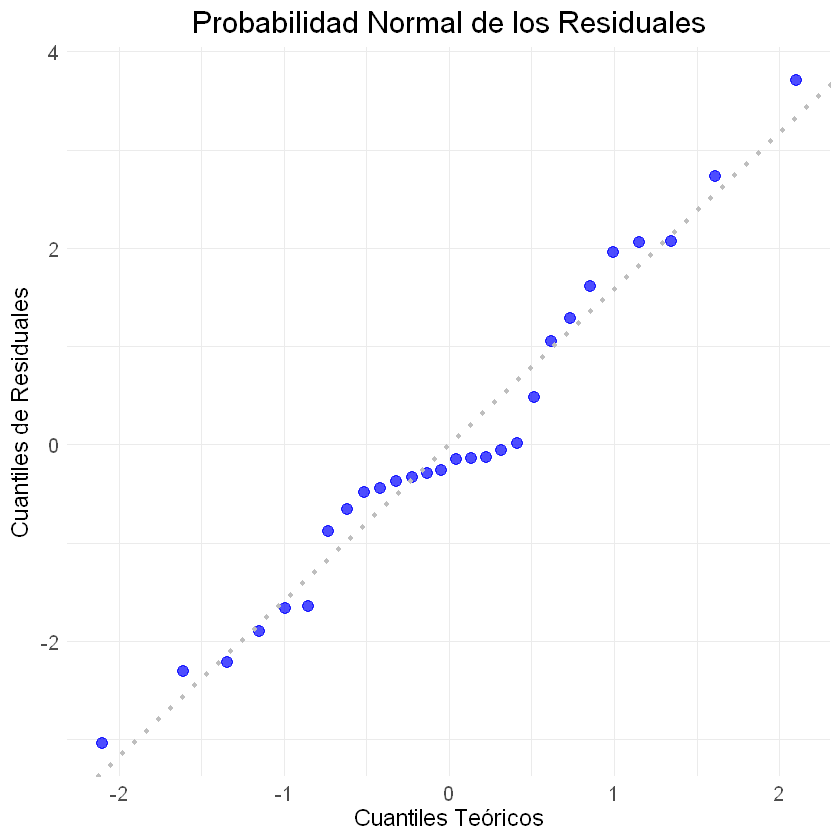

In [180]:
# Plot

PlotQQResiduals(LinearModel)

## **f**. Gráfica de los Residuales en Función de la Respuesta Predicha

Como en el plot presentado no figura algún patrón o curva, podría ser indicio de que los residuales represntan la parte aleatoria o ruido propio de cada instancia (observación). Por lo tanto, se tiene un modelo bien ajustado.

In [201]:
PlotPredictResiduals <- function(
    LinearModel,
    TargetName
)
{
    PlotData <- data.frame(
        Fitted = fitted(LinearModel),
        Residuals = residuals(LinearModel)
    )
  

    plot <- ggplot(PlotData,aes(x=Fitted,y=Residuals)) +
        geom_point(alpha=0.7,color='blue',size=3) +
        labs(
            title = 'Residuales en Función de la Respuesta Predicha',
            x = TargetName,
            y = 'Residual'
        ) +
        theme_minimal() +
        theme(
            plot.title = element_text(hjust=0.5,size=18),
            axis.text = element_text(size=12),
            axis.title = element_text(size=14)
        )
  
    return(plot)
}

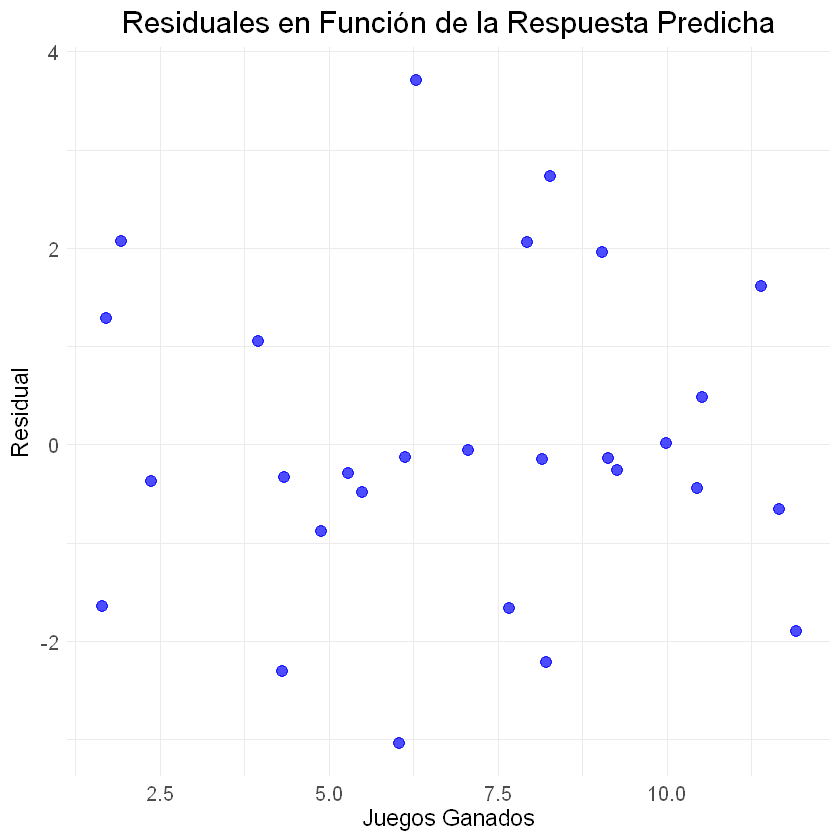

In [202]:
# Plot

PlotPredictResiduals(LinearModel,'Juegos Ganados')

## **g**. Gráficas de los Residuales en Función de las Variables Regresoras

En la variable $x_2$ no parece que tengan algún patrón o curva, en cambio, en las variables $x_7$ y $x_8$, se puede apreciar zonas donde incrementan y decrementan, esto significa que posiblemente los datos no siguen un patrón homocedástico (es decir, existe un factor externo que modifique la varianza propia en estos dos atributos).

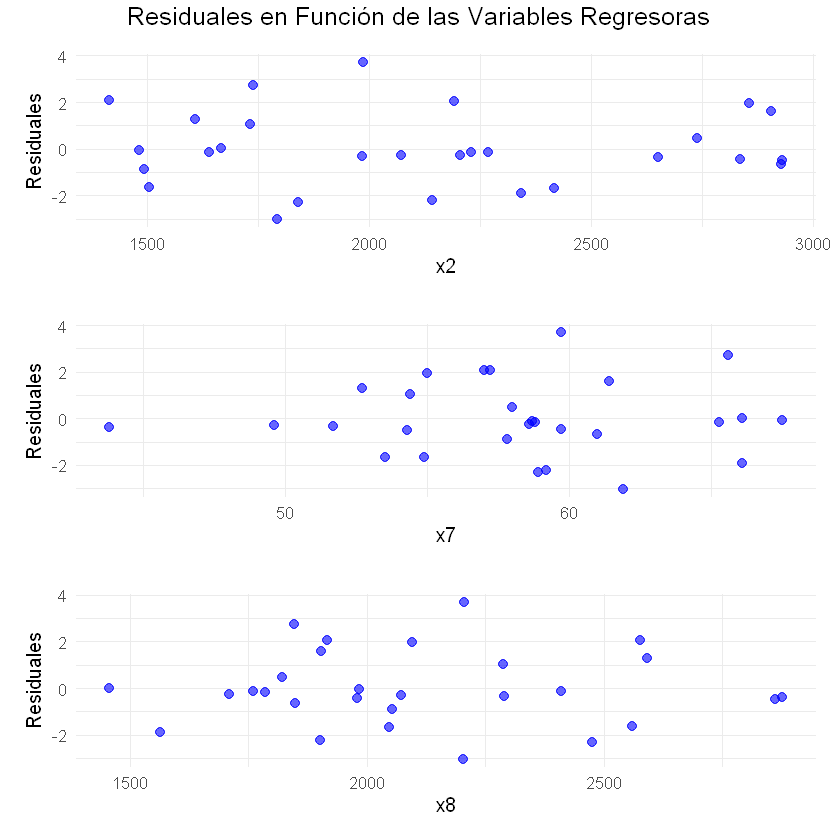

In [228]:
#' Función para plotear los residuales en función de las variables del modelo.
PlotVariableResiduals <- function(
    LinearModel,
    Dataset,
    FeaturesModel
)
{
    ResidValues <- resid(LinearModel)
    
    PlotList <- list()
    
    for (feature in FeaturesModel) 
    {
        PlotData <- data.frame(x=Dataset[[feature]],y=ResidValues)
        
        plot <- ggplot(PlotData, aes(x=x,y=y)) +
            geom_point(alpha=0.6,color='blue',size=2.5) +
            labs(x=feature,y='Residuales') +
            theme_minimal() +
            theme(
                plot.margin = unit(c(1, 1, 1, 1),'lines'),
                axis.text = element_text(size=10),
                axis.title = element_text(size=12),
            )
        
        PlotList[[feature]] <- plot
    }
    
    grid.arrange(
        grobs = PlotList,
        nrow = 3,
        top = textGrob(
            'Residuales en Función de las Variables Regresoras',
            gp = gpar(fontsize=15)
        )
    )
}

# Plot

PlotVariableResiduals(
    LinearModel,
    DatasetFutbol,
    FeaturesModel
)